In [1]:
import os
os.chdir('D:/source/repos')
os.getcwd()

'D:\\source\\repos'

In [2]:
import numpy as np
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sb; sb.set()
import trading.Funds
from trading.Funds.FundReader import FundReader
from trading.Funds.DBMgr import DBMgr
from trading.Funds.Monitor import *
from trading.Funds.VisualFunds import VisualFunds

### Update database

In [3]:
Initialize()
print( dt.datetime.now().strftime('%Y-%m-%d'))
UpdateAssetsPerformance()

Initialized
2020-11-19

Updating Fund Values...

LU0087412390 133.01 133.01
LU1731833304 10.2 10.2
LU1700711077 153.24 153.24
LU1594335520 115.32 115.32
LU0050372472 31.43 31.43
LU0607516092 20.02 20.02
ES0155844030 38.68 38.68
LU0267388220 26.45 26.45
LU0386882277 303.22 303.22
LU0335216932 97.5 97.5
LU0026741651 842.35 779.99
LU0836513001 264.67 223.55
LU0171310443 57.21 57.21
LU0122379950 57.29 48.39
LU1684797787 331.35 279.87
LU0329931090 7.5 6.33
LU0505655562 7.3 6.17
LU0097036916 33.16 28.01
LU0260869739 22.09 22.09
IE00B29M2H10 2.97 2.97
LU0243957742 21.46 21.46
LU0072913022 655.71 553.83
IE0002639668 40.45 34.17
IE00B52VLZ70 7.66 7.66
LU0119209004 2586.27 2184.43
IE00B03HCZ61 28.85 28.85
LU0306632414 36.18 36.18
LU0260870158 30.07 30.07
LU0094560744 37.8 37.8
LU0366534344 247.67 247.67
IE00B530N462 20.68 20.68
LU0049842262 2892.33 2442.94
LU0011963328 51.06 31.33
LU0996182563 199.15 199.15
LU1548497772 226.77 226.77
LU0503631714 268.91 268.91
ES0157638000 11.42 11.42

Updating 

### Performance

#### Funds

In [4]:
dff = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 1 GROUP BY date ORDER BY date DESC'); dff.head(10)

,date,purchase,current,diff
0,2020-11-19,100532,124662,24130
0,2020-11-18,100532,125158,24626
0,2020-11-17,100532,125050,24518
0,2020-11-16,100532,124407,23875
0,2020-11-14,100532,124383,23851
0,2020-11-13,100532,124507,23975
0,2020-11-12,100532,124450,23918
0,2020-11-11,100532,123534,23002
0,2020-11-10,100532,123987,23455
0,2020-11-09,96546,118756,22210


#### Stocks

In [5]:
dfs = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 2 GROUP BY date ORDER BY date DESC'); dfs.head(10)

,date,purchase,current,diff
0,2020-11-19,41598.4,57676.6,16078.1
0,2020-11-16,41546,58524,16978
0,2020-11-14,41546,57964,16418
0,2020-11-13,41546,57393,15847
0,2020-11-12,41546,58002,16456
0,2020-11-11,41546,58063,16517
0,2020-11-10,41546,56940,15394
0,2020-11-09,48209,67522,19313
0,2020-11-08,48209,64951,16742
0,2020-11-06,48209,64089,15880


#### Options

In [6]:
dfo = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 3 GROUP BY date ORDER BY date DESC'); dfo.head(10)

,date,purchase,current,diff
0,2020-11-19,250,90,-160
0,2020-11-16,250,76,-174
0,2020-11-14,250,54,-196
0,2020-11-13,250,58,-192
0,2020-11-12,250,55,-195
0,2020-11-11,250,63,-187
0,2020-11-10,250,68,-182
0,2020-11-09,1750,1316,-434
0,2020-11-08,1750,1109,-641
0,2020-11-06,1750,1145,-605


#### P&L

In [7]:
PL = vf.GetQueryRes('select date, round(sum(pleur)*100)/100 as PL from operation group by date order by date desc'); PL.head(10)
totPl = round(sum(PL['pl']))
print('Total P&L : ', totPl, '\n')
PL

Total P&L :  3388 



,date,pl
0,2020-11-10,2814.29
0,2020-01-29,573.24


#### All

In [8]:
df = vf.GetQueryRes('SELECT date, SUM(purchase) AS purchase, SUM(current) AS current, SUM(diff) AS diff FROM performance WHERE portfolioid = 0 GROUP BY date ORDER BY date DESC'); 
totDiff = df.iloc[0]['diff'] + totPl
print('Total Diff + P&L : ', totDiff, '\n')
df.head(10)

Total Diff + P&L :  43436.13 



,date,purchase,current,diff
0,2020-11-19,142380,182429,40048.1
0,2020-11-16,142328,183007,40679
0,2020-11-14,142328,182401,40073
0,2020-11-13,142328,181958,39630
0,2020-11-12,142328,182507,40179
0,2020-11-11,142328,181660,39332
0,2020-11-10,142328,180995,38667
0,2020-11-09,146505,187594,41089
0,2020-11-08,146505,184903,38398
0,2020-11-06,146505,183900,37395


In [9]:
totDiff = df.iloc[0]['diff'] + totPl
totDiff


43436.13

Text(0.5, 1.0, 'ALL')

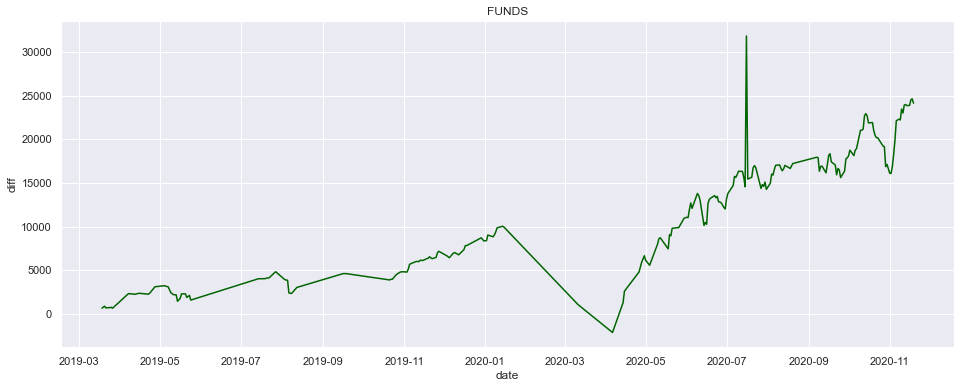

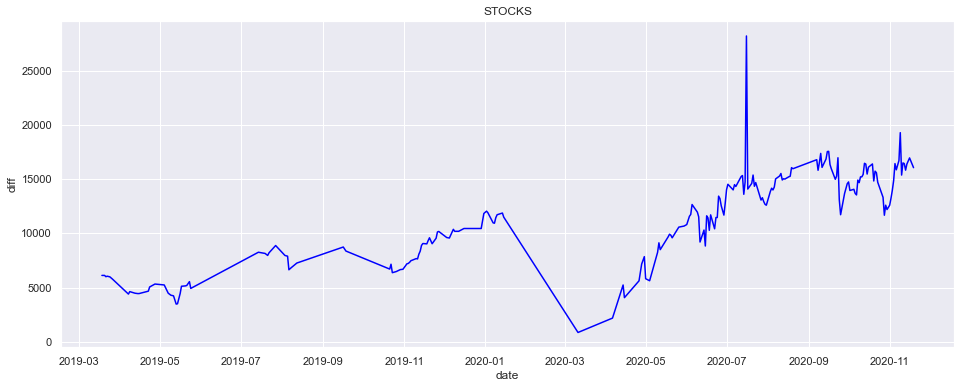

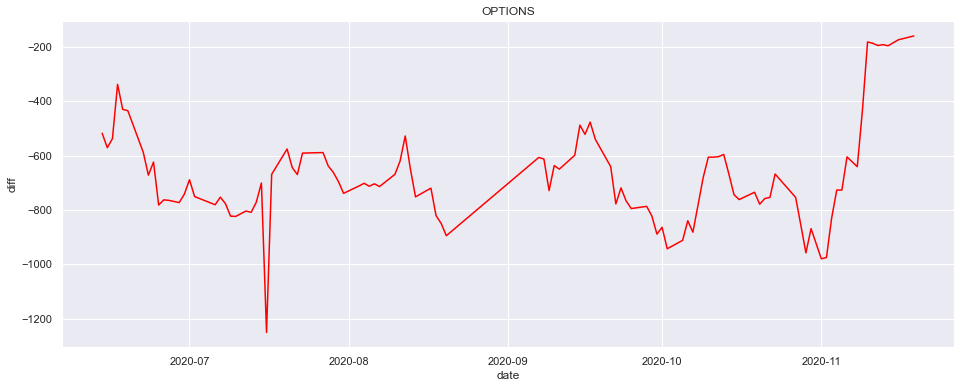

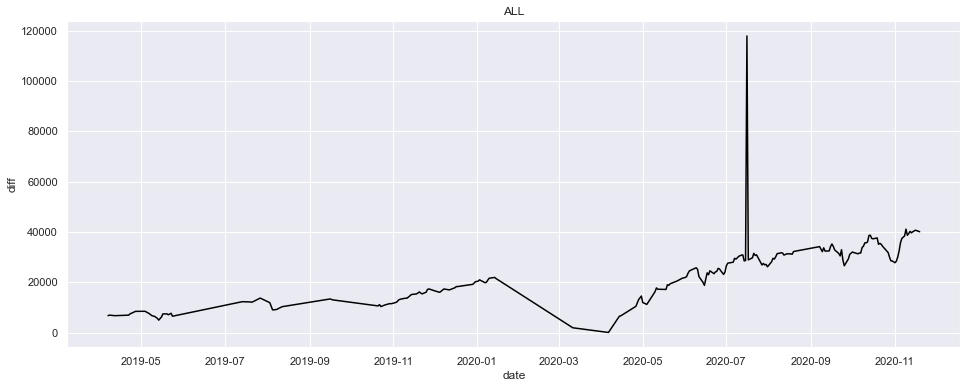

In [10]:
plt.figure(figsize=(16, 6))
dff['diff'].index = dff['date']
sb.lineplot(data=dff['diff'].astype(np.float), color="darkgreen").set_title('FUNDS')

plt.figure(figsize=(16, 6))
dfs['diff'].index = dfs['date']
sb.lineplot(data=dfs['diff'].astype(np.float), color="blue").set_title('STOCKS')

plt.figure(figsize=(16, 6))
dfo['diff'].index = dfo['date']
sb.lineplot(data=dfo['diff'].astype(np.float), color="red").set_title('OPTIONS')

plt.figure(figsize=(16, 6))
df['diff'].index = df['date']
sb.lineplot(data=df['diff'].astype(np.float), color="black").set_title('ALL')

[]

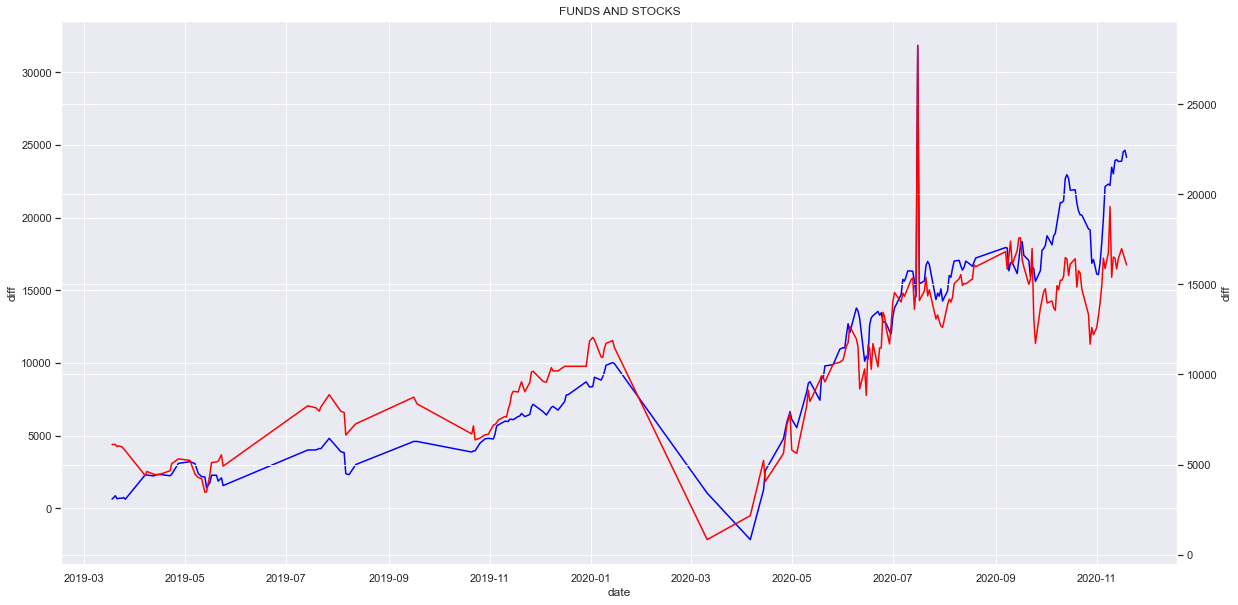

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(data=dff['diff'].astype(np.float), color="blue")
ax2 = ax.twinx()
sb.lineplot(data=dfs['diff'].astype(np.float), color="red").set_title('FUNDS AND STOCKS')
plt.plot(figsize=(16, 6))